In [1]:
##import main libraries 
import pandas as pd 
import researchpy as rp
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure

In [68]:
## import csv and read data 
df_palm = pd.read_csv('palm_ffb.csv')
df_palm.dataframeName = 'palm_ffb.csv'
nRow, nCol = df_palm.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 130 rows and 9 columns


In [69]:
df_palm.head(10)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
5,01.06.2008,532.5,27.116667,21.4,35.5,182.3,24,829817.5676,1.48
6,01.07.2008,544.7,27.035484,21.2,33.9,201.6,26,814475.3012,1.66
7,01.08.2008,569.9,27.200000,21.7,34.5,283.2,26,782279.5322,1.71
8,01.09.2008,571.7,27.556667,21.2,35.1,176.3,25,795237.6543,1.62
9,01.10.2008,565.3,27.358065,22.1,33.9,217.5,24,765090.8602,1.86


In [6]:
list (df_palm.columns)

['Date',
 'SoilMoisture',
 'Average_Temp',
 'Min_Temp',
 'Max_Temp',
 'Precipitation',
 'Working_days',
 'HA_Harvested',
 'FFB_Yield']

In [7]:
df_palm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
Date             130 non-null object
SoilMoisture     130 non-null float64
Average_Temp     130 non-null float64
Min_Temp         130 non-null float64
Max_Temp         130 non-null float64
Precipitation    130 non-null float64
Working_days     130 non-null int64
HA_Harvested     130 non-null float64
FFB_Yield        130 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


Result : 

Data Has not NONE value 

In [8]:
df_palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


# Compute Correlation 

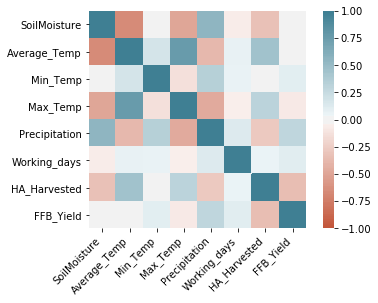

In [111]:
# Correlation matrix
corr = df_palm.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Result

SoilMoisture, Average_Temp and Min_Temp are correlated.

• FFB_Yield has strong negative correlation with HA_Harvested

• FFB_Yield has strong positive correlation with Precipitation

• FFB_Yield has strong moderate correlation with Working days

• FFB_Yield has weaker positive correlation with Max_Temp and Min_Temp

# Disterbuted Analysis 

In [13]:
df_palm.skew()

SoilMoisture    -0.394336
Average_Temp    -0.340606
Min_Temp        -1.121358
Max_Temp        -0.215635
Precipitation    0.526227
Working_days    -0.660814
HA_Harvested    -0.064445
FFB_Yield        0.188629
dtype: float64

In [14]:
df_palm.kurt()

SoilMoisture    -0.262867
Average_Temp     0.141138
Min_Temp         2.000500
Max_Temp        -0.591251
Precipitation    1.206761
Working_days     0.565301
HA_Harvested     0.085981
FFB_Yield       -0.670960
dtype: float64

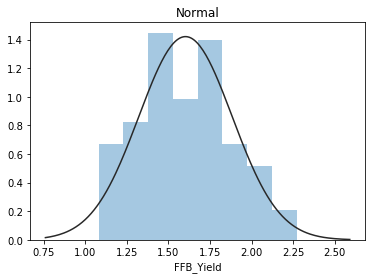

In [18]:
## assume that FFB_Yield is target value 
import seaborn as sns 
import scipy.stats as st
y = df_palm['FFB_Yield']
plt.figure(2); plt.title('Normal Disterbution')
sns.distplot(y, kde=False, fit=st.norm)


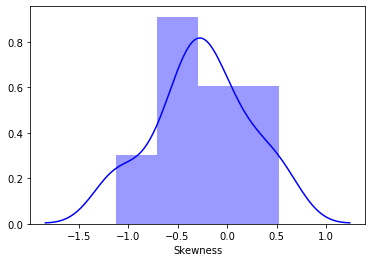

In [19]:
sns.distplot(df_palm.skew(),color='blue',axlabel ='Skewness')

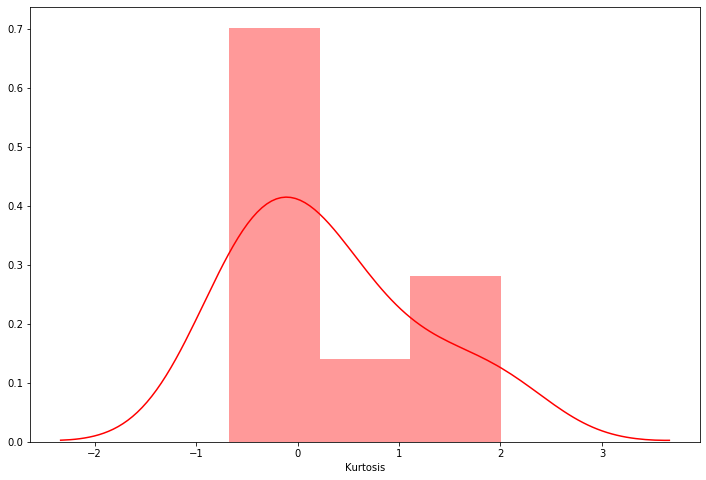

In [21]:
plt.figure(figsize = (12,8))
sns.distplot(df_palm.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

Result
- Data contains all numerical columns
- No missing Values
- No issues of Variance
- No issues of skewness and kurtosis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215B260BD48>,
      dtype=object)

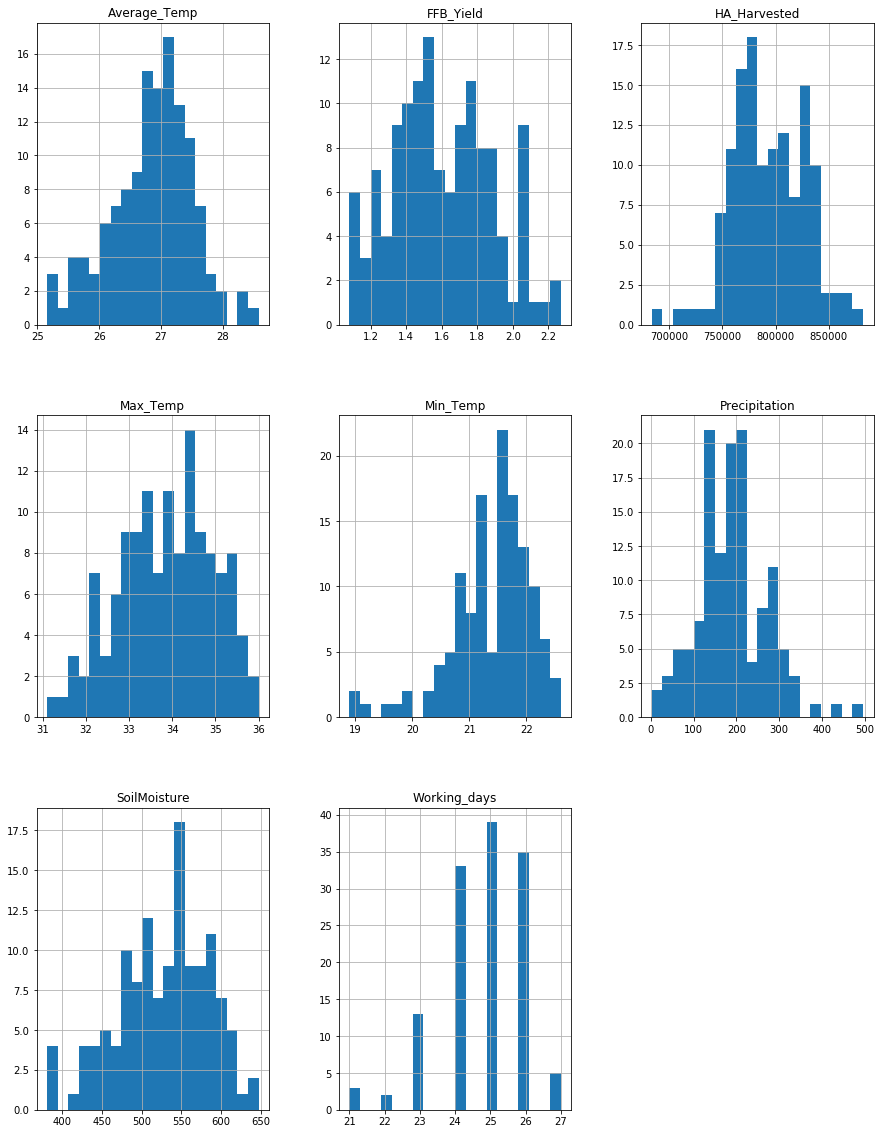

In [22]:
### histogaram bar for all attribute of data  
df_palm.hist(bins=20,figsize=(15,20))

Result 

min_temp is slightly skewed to the left(negatively skewed)
Working Day has Discrete value 


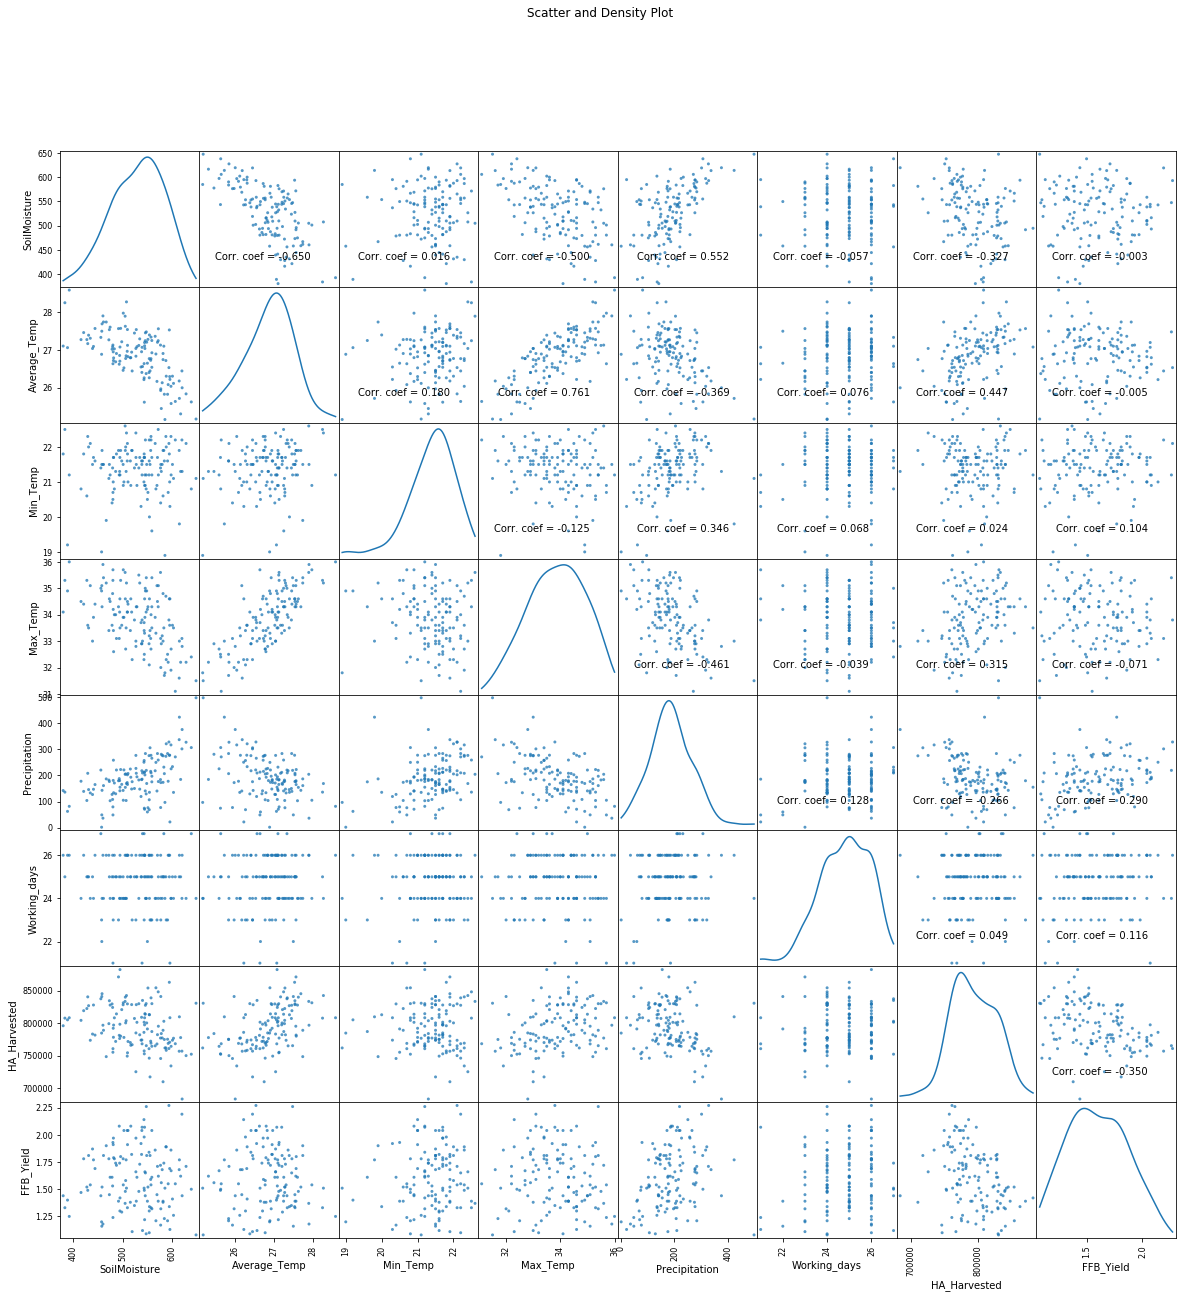

In [110]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

    
plotScatterMatrix(df_palm, 20, 10)

Result

FFB Yield has negative correlation with HA_Harvested aslo it has positive correlation with min_temp, working days and precipitation

precipitation and soil moisture are highly correlated

# Find Feature Importance 

# Radar Chart by correlation 


assum is that FFB_Yield is target value 

               SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
SoilMoisture       1.000000     -0.649878  0.015839 -0.499936       0.552001   
Average_Temp      -0.649878      1.000000  0.180396  0.761083      -0.369386   
Min_Temp           0.015839      0.180396  1.000000 -0.124754       0.345944   
Max_Temp          -0.499936      0.761083 -0.124754  1.000000      -0.461117   
Precipitation      0.552001     -0.369386  0.345944 -0.461117       1.000000   
Working_days      -0.057015      0.076321  0.068414 -0.039112       0.127897   
HA_Harvested      -0.326539      0.446515  0.024396  0.314827      -0.265866   
FFB_Yield         -0.003183     -0.005494  0.103830 -0.071201       0.289604   

               Working_days  HA_Harvested  FFB_Yield  
SoilMoisture      -0.057015     -0.326539  -0.003183  
Average_Temp       0.076321      0.446515  -0.005494  
Min_Temp           0.068414      0.024396   0.103830  
Max_Temp          -0.039112      0.314827  -0.071201  
Prec

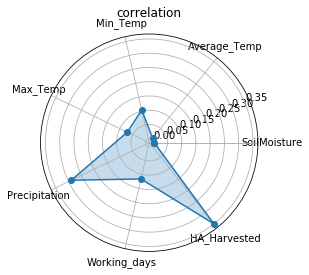

In [72]:
def radarchart(df): 
    corr = df.corr()
    print(corr)

    # Get angles from 0 to 360
    cols = list(corr.columns)
    data = list(abs(corr['FFB_Yield']))
    temp1=[]
    temp2= []
    for idx , value in enumerate(data):
        if value < 0.99:
            temp1.append(value)
            temp2.append(cols[idx])
    data = temp1
    cols = temp2
    angles = np.linspace(0, 2 * np.pi, len(cols), endpoint=False)
    # Concat first element of data points to the end to make it full circle
    stats = np.concatenate((data, [data[0]]))
    angles = np.concatenate((angles, [angles[0]]))

    # Radar chart
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    # Setting polar=true to enable polar coordinates
    ax.plot(angles, stats, "o-")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180 / np.pi, cols)
    plt.title('correlation')
    plt.show()
radarchart(df_palm)

In [ ]:
from xgboost import XGBRegressor
X = df_palm.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = df_palm.FFB_Yield

# Linear Regression Feature Importance

Feature: SoilMoisture, Score: -0.00111
Feature: Average_Temp, Score: 0.09133
Feature: Min_Temp, Score: -0.02489
Feature: Max_Temp, Score: -0.01294
Feature: Precipitation, Score: 0.00132
Feature: Working_days, Score: 0.01398
Feature: HA_Harvested, Score: -0.00000


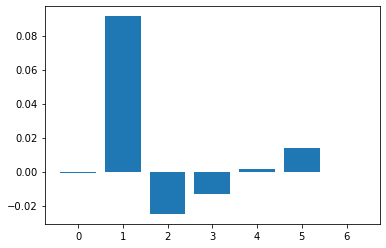

In [95]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# CART Regression Feature Importance


Feature: SoilMoisture, Score: 0.08151
Feature: Average_Temp, Score: 0.17789
Feature: Min_Temp, Score: 0.13712
Feature: Max_Temp, Score: 0.02027
Feature: Precipitation, Score: 0.21828
Feature: Working_days, Score: 0.01026
Feature: HA_Harvested, Score: 0.35467


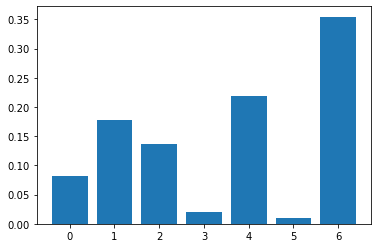

In [99]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest Regression Feature Importance

Feature: SoilMoisture, Score: 0.11384
Feature: Average_Temp, Score: 0.15538
Feature: Min_Temp, Score: 0.05940
Feature: Max_Temp, Score: 0.07310
Feature: Precipitation, Score: 0.23174
Feature: Working_days, Score: 0.02967
Feature: HA_Harvested, Score: 0.33685


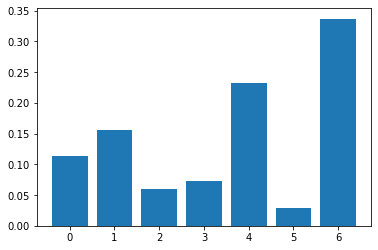

In [108]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# xgboost for feature importance

Feature: SoilMoisture, Score: 0.08290
Feature: Average_Temp, Score: 0.08984
Feature: Min_Temp, Score: 0.04806
Feature: Max_Temp, Score: 0.08801
Feature: Precipitation, Score: 0.20224
Feature: Working_days, Score: 0.08785
Feature: HA_Harvested, Score: 0.40109


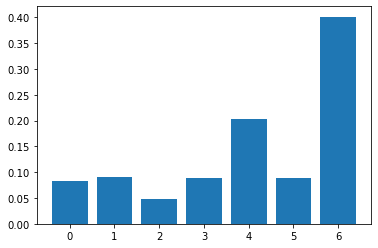

In [109]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Result 




According of 3 models we can say :

HA_Harvested, Precipitation and SoilMoisture are importance features.
 
Average_Temp has a high importance in random forest. 

SoilMoisture is positively affected by Average_Temp which has shown in correlation analysis.

The reverse does not make scientific sense. Hence, it would be enough to consider SoilMoisture and drop Average_Temp.